# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [30]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [5]:
#function

In [6]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range of values for GRE (220 min and 800 max) is much larger than the range of values for GPA (1.0 min and 4.0 max).

#### Question 4. Drop data points with missing data


In [12]:
df = df_raw.dropna(axis=0, how='any')
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [22]:
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer: Using isnull() and sum(), we can count the total amount of null values in the columns. If each sum is 0, then that means there are no null values left in our data set.

#### Question 6. Create box plots for GRE and GPA

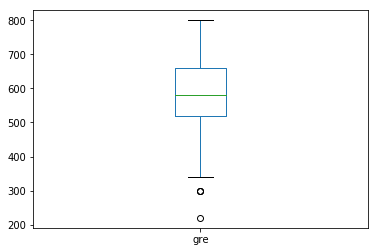

In [23]:
#boxplot 1
df['gre'].plot(kind='box')

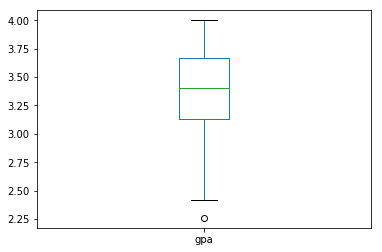

In [24]:
#boxplot 2 
df['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: It shows that the data have some outliers, and that the distribution might be a little skewed in the case of GPA.

#### Question 8. Describe each distribution 

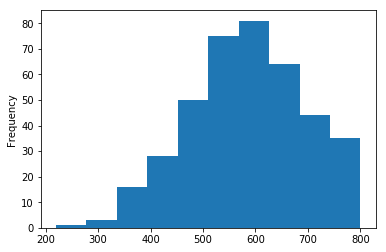

In [26]:
# plot the distribution of each variable 
df['gre'].plot(kind='hist')

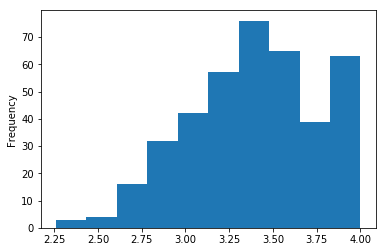

In [27]:
df['gpa'].plot(kind='hist')

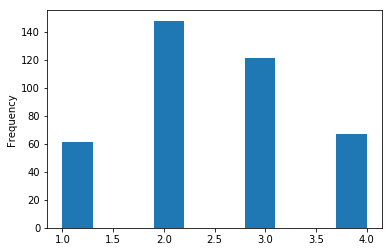

In [28]:
df['prestige'].plot(kind='hist')

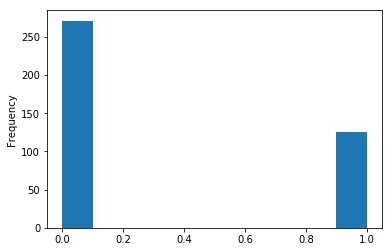

In [29]:
df['admit'].plot(kind='hist')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: For the most part, the variables seem normally distributed. In the case of GPA, it appears there's a bit of a left skew, so the data may need to be transformed. Also, 'admit' is not normally distributed because it is a categorical variable instead of a continuous one.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: GPA might need a bit of a correction since we have a slight left skew to it. We could try using exponentiating it.

#### Question 11. Which of our variables are potentially colinear? 

               gpa       gre  prestige
gpa       1.000000  0.382408 -0.060976
gre       0.382408  1.000000 -0.124533
prestige -0.060976 -0.124533  1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


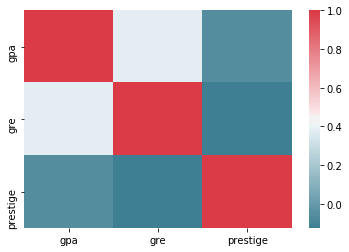

In [33]:
# create a correlation matrix for the data

div_map = sns.diverging_palette(220, 10, as_cmap=True)
df_corr = df[['gpa', 'gre', 'prestige']].corr()

print df_corr
print sns.heatmap(df_corr, cmap=div_map)

#### Question 12. What did you find?

Answer: GPA and GRE score have a slight correlation, but not strong enough to show colinearity.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Using presitge of undergraduate schools as a predictor variable, logistic regression will be used to determine the likelihood that someone is accepted to graduate school. We will turn prestige into a dummy variable and use it in our formula for logistic regression.

#### Question 14. What is your hypothesis? 

Answer: The higher the prestige of undergrad alma mater, the more likely one is to be accepted to graduate school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


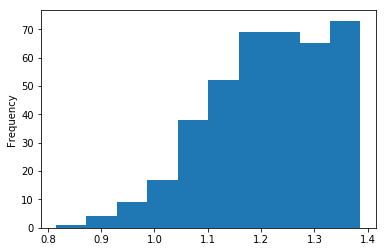

In [39]:
df['log_gpa'] = np.log(df['gpa'])
df['log_gpa'].plot(kind='hist')

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


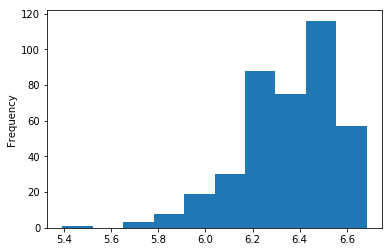

In [40]:
df['log_gre'] = np.log(df['gre'])
df['log_gre'].plot(kind='hist')

Doing a log transformation does not seem to help the skew (and in fact looks like it made the skew worse). Perhaps exponentiating the data would fix it.

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


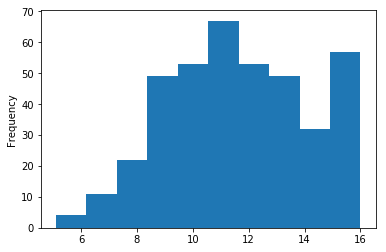

In [47]:
df['exp_gpa'] = (df['gpa'])** 2
df['exp_gpa'].plot(kind='hist')

The skew looks a bit better here, but still not perfectly normal.

#### 3. Advanced: Impute missing data